# Задачи к Лекции 3

__Исходные данные__ 

Дан файл **"mlbootcamp5_train.csv"**. В нем содержатся данные об опросе 70000 пациентов с целью определения наличия заболеваний сердечно-сосудистой системы (ССЗ). Данные в файле промаркированы и если у человека имееются ССЗ, то значение **cardio** будет равно 1, в противном случае - 0. Описание и значения полей представлены во второй лекции.

__Загрузка файла__

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("../data/mlbootcamp5_train.csv", 
                 sep=";", 
                 index_col="id")
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Задачи

**1. Построить наивный байесовский классификатор для количественных полей age, height, weight, ap_hi, ap_lo. Исправить данные, если это необходимо. Привести матрицу неточностей и сравнить со значением полученным в ходе лекции. Попытаться объяснить разницу.**

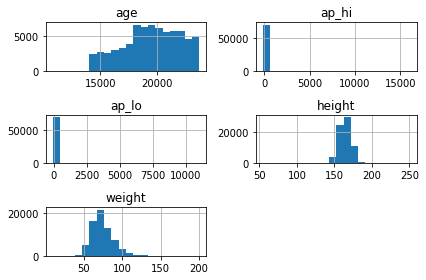

In [29]:
df[['age', 'height', 'weight', 'ap_hi', 'ap_lo']].hist(bins=20)
plt.tight_layout()
#данные по ap_hi и ap_lo сосредоточены в небольшом интервале, 
#соответственно нужно получить данные из этих интервалов

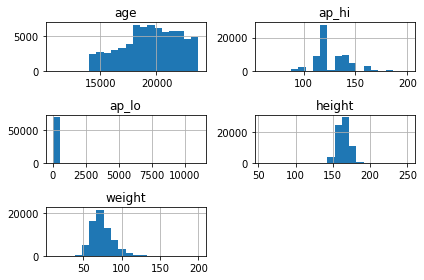

In [30]:
data = df[(df["ap_hi"] >= 50) & (df["ap_hi"] <= 200)]
data[['age', 'height', 'weight', 'ap_hi', 'ap_lo']].hist(bins=20)
plt.tight_layout()
#исправление данных ap_hi

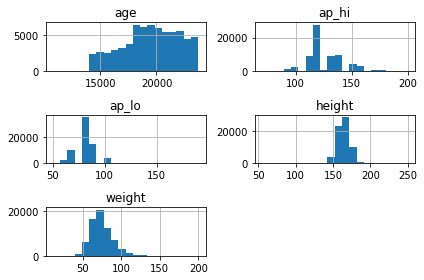

In [61]:
data_pure = data[(data["ap_lo"] >= 50) & (data["ap_lo"] <= 200)]
data_pure[['age', 'height', 'weight', 'ap_hi', 'ap_lo']].hist(bins=20)
plt.tight_layout()
#исправление данных ap_lo

In [51]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import itertools

#наивный Байесовский классификатор
def naive_bayes_classificator(nb, train, target):
    model = gnb.fit(train, target)
    predict = model.predict(train)
    print('Процент угаданных болезней ', 
         ((target == predict).sum() / data.shape[0])*100, 
          ' из ', data.shape[0], ' записей')
    return predict

#функция для построения матрицы неточностей
class_names = ["Здоров", "Болен"]
def plot_confusion_matrix(cm, classes, normalize=True, title='Матрица неточностей', cmap=plt.cm.Blues):    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.min() + (cm.max() - cm.min()) * 2 / 3.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('Истина')
    plt.xlabel('Предсказание')
    plt.tight_layout()

Процент угаданных болезней  70.8848230790504  из  68703  записей


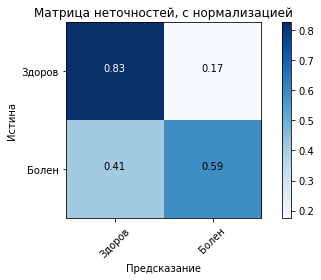

In [62]:
gnb = GaussianNB()

train = data_pure[['age', 'height', 'weight', 'ap_hi', 'ap_lo']]
target = data_pure['cardio']

cnf_matrix = confusion_matrix(target, naive_bayes_classificator(gnb, train, target))
plot_confusion_matrix(cnf_matrix, classes=class_names, 
                      title='Матрица неточностей, с нормализацией')

**Комментарии:** Ваши комментарии здесь.

**2. Придумать как построить наивный байесовский классификатор для категориальных полей cholesterol, gluc. Привести матрицу неточностей и сравнить со значениями из задачи 1. (MultinomialNB здесь не подходит, как и ComplementNB)**

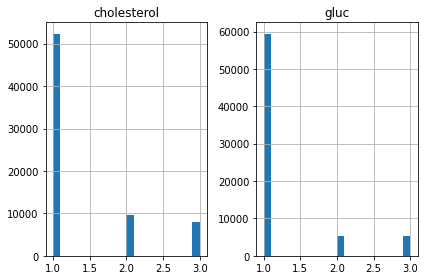

In [48]:
df[['cholesterol', 'gluc']].hist(bins=20)
plt.tight_layout()

Процент угаданных болезней  59.88093678587544  из  68703  записей


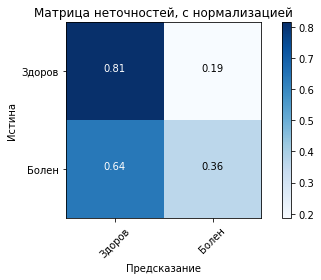

In [63]:
gnb_category = GaussianNB()

train = df[['cholesterol', 'gluc']]
target = df['cardio']

cnf_matrix = confusion_matrix(target, naive_bayes_classificator(gnb_category, train, target))
plot_confusion_matrix(cnf_matrix, classes=class_names, 
                      title='Матрица неточностей, с нормализацией')

**Комментарии:** Ваши комментарии здесь.

**3. Построить наивный байесовский классификатор для бинарных полей gender, smoke, alco, active. Привести матрицу неточностей и сравнить с предыдущими значениями.**

Процент угаданных болезней  59.72519395077362  из  68703  записей


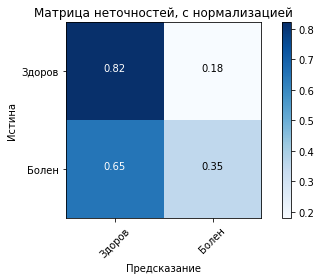

In [64]:
from sklearn.naive_bayes import BernoulliNB

bnb = GaussianNB()

train_binar = df[['gender', 'smoke', 'alco', 'active', 'cholesterol', 'gluc']]
target = df['cardio']

cnf_matrix = confusion_matrix(target, naive_bayes_classificator(bnb, train_binar, target))
plot_confusion_matrix(cnf_matrix, classes=class_names, 
                      title='Матрица неточностей, с нормализацией')

**Комментарии:** Ваши комментарии здесь.

**4. К этому моменту у вас есть три независимых классификатора: по количественным полям, категориальным и бинарным. Придумать, как их объединить в один единый классификатор, который учитывает все эти поля. Привести матрицу неточностей для него и сравнить с предыдущими значениями. Попытаться объяснить разницу.**

Процент угаданных болезней  70.94013361861927  из  68703  записей


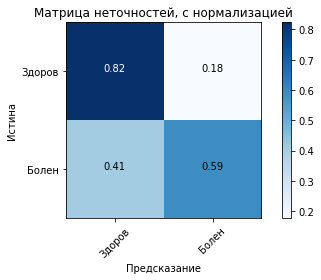

In [65]:
train_binar = data_pure[['gender', 'smoke', 'alco', 'active', 'age', 'height', 'weight', 'ap_hi', 'ap_lo']]
target = data_pure['cardio']

cnf_matrix = confusion_matrix(target, naive_bayes_classificator(gnb, train_binar, target))
plot_confusion_matrix(cnf_matrix, classes=class_names, 
                      title='Матрица неточностей, с нормализацией')

**Комментарии:** Вероятно, не самое правильно решение: 
были объединены все необходимые поля, 
использовался Гауссов классификатор,
но процент угаданных болезней (правильно предсказанных) оказался выше, чем у предыдущих классификаторов, 
скорее всего из-за повышения количества данных, что привело к более точному результату

**5. (Не обязательно) Теперь мы умеем делать классификацию в рамках наивного предположения об независимости всех признаков. Сейчас же нужно попробовать учесть взаимосвязь между признаками через условные вероятности. Построить классификатор с учетом такой связи. Сравнить результат с ранее полученными значениями.**

In [3]:
# A lot of code here

**Комментарии:** Ваши комментарии здесь.